<a href="https://colab.research.google.com/github/ManupatiEshwar/reniforecement/blob/main/LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Value Iteration - Average Reward over 100 episodes: 1.0
✅ Policy Iteration - Average Reward over 100 episodes: 1.0


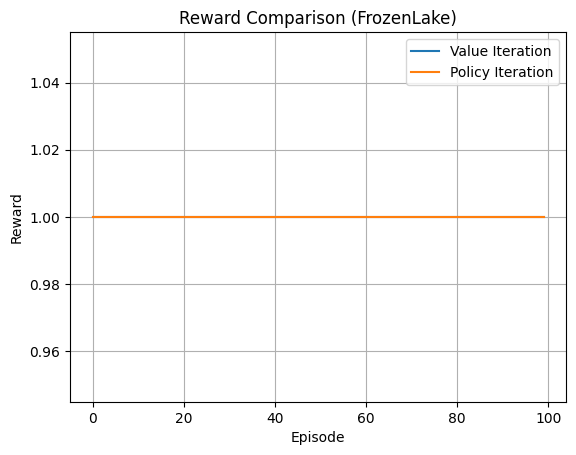

In [ ]:

!pip3 install gymnasium[classic_control] --quiet

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt


env = gym.make("FrozenLake-v1", is_slippery=False)
env = env.unwrapped

n_states = env.observation_space.n
n_actions = env.action_space.n
gamma = 0.99
theta = 1e-8

# ---------------------- Value Iteration ----------------------
def value_iteration(env):
    V = np.zeros(n_states)
    while True:
        delta = 0
        for s in range(n_states):
            q_values = []
            for a in range(n_actions):
                q = 0
                for prob, next_state, reward, done in env.P[s][a]:
                    q += prob * (reward + gamma * V[next_state])
                q_values.append(q)
            max_q = max(q_values)
            delta = max(delta, abs(V[s] - max_q))
            V[s] = max_q
        if delta < theta:
            break

    policy = np.zeros(n_states, dtype=int)
    for s in range(n_states):
        q_values = []
        for a in range(n_actions):
            q = 0
            for prob, next_state, reward, done in env.P[s][a]:
                q += prob * (reward + gamma * V[next_state])
            q_values.append(q)
        policy[s] = np.argmax(q_values)
    return policy, V

# ---------------------- Policy Iteration ----------------------
def policy_iteration(env):
    policy = np.zeros(n_states, dtype=int)
    V = np.zeros(n_states)

    while True:
        # Policy Evaluation
        while True:
            delta = 0
            for s in range(n_states):
                v = 0
                a = policy[s]
                for prob, next_state, reward, done in env.P[s][a]:
                    v += prob * (reward + gamma * V[next_state])
                delta = max(delta, abs(V[s] - v))
                V[s] = v
            if delta < theta:
                break

        # Policy Improvement
        policy_stable = True
        for s in range(n_states):
            old_action = policy[s]
            q_values = []
            for a in range(n_actions):
                q = 0
                for prob, next_state, reward, done in env.P[s][a]:
                    q += prob * (reward + gamma * V[next_state])
                q_values.append(q)
            new_action = np.argmax(q_values)
            policy[s] = new_action
            if old_action != new_action:
                policy_stable = False

        if policy_stable:
            break

    return policy, V

# ---------------------- Run Policy ----------------------
def run_policy(env, policy, render=False):
    total_rewards = 0
    state, _ = env.reset()
    while True:
        if render:
            env.render()
        action = policy[state]
        state, reward, terminated, truncated, _ = env.step(action)
        total_rewards += reward
        if terminated or truncated:
            break
    return total_rewards

# ---------------------- Run Experiments ----------------------
vi_policy, vi_V = value_iteration(env)
vi_rewards = [run_policy(env, vi_policy) for _ in range(100)]
print("✅ Value Iteration - Average Reward over 100 episodes:", np.mean(vi_rewards))

pi_policy, pi_V = policy_iteration(env)
pi_rewards = [run_policy(env, pi_policy) for _ in range(100)]
print("✅ Policy Iteration - Average Reward over 100 episodes:", np.mean(pi_rewards))

# ---------------------- Plot Results ----------------------
plt.plot(vi_rewards, label='Value Iteration')
plt.plot(pi_rewards, label='Policy Iteration')
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Reward Comparison (FrozenLake)")
plt.legend()
plt.grid(True)
plt.show()
